# Analysis of  Indian premier league

# Data prepration and cleaning

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
match_data = pd.read_csv("D:/python project/IPL Dataset and Code/IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("D:/python project/IPL Dataset and Code/IPL Ball-by-Ball 2008-2020.csv")

In [60]:
#top 5 rows form the data sets
match_data.head()

,ID,City,Date,Player_of_match,Venue,Neutral_venue,Team1,Team2,Toss_winner,Toss_decision,Winner,Result,Result_margin,Eliminator,Method,Umpire1,Umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [61]:
ball_data.head()

,ID,Inning,Over,Ball,Batsman,Non_striker,Bowler,Batsman_runs,Extra_runs,Total_runs,Non_boundary,Is_wicket,Dismissal_kind,Player_dismissed,Fielder,Extras_type,Batting_team,Bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [56]:
match_data.describe()

,ID,Neutral_venue,Result_margin,Season
count,8.160000e+02,816.000000,799.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,2013.926471
std,3.058943e+05,0.292512,22.068427,3.665054
min,3.359820e+05,0.000000,1.000000,2008.000000
25%,5.012278e+05,0.000000,6.000000,2011.000000
50%,7.292980e+05,0.000000,8.000000,2014.000000
75%,1.082626e+06,0.000000,19.500000,2017.000000
max,1.237181e+06,1.000000,146.000000,2020.000000


In [6]:
#data cleaning 
match_data.isnull().sum()

ID                   0
City                13
Date                 0
Player_of_match      4
Venue                0
Neutral_venue        0
Team1                0
Team2                0
Toss_winner          0
Toss_decision        0
Winner               4
Result               4
Result_margin       17
Eliminator           4
Method             797
Umpire1              0
Umpire2              0
dtype: int64

In [57]:
match_data.isnull().any()

ID                 False
City                True
Date               False
Player_of_match     True
Venue              False
Neutral_venue      False
Team1              False
Team2              False
Toss_winner        False
Toss_decision      False
Winner              True
Result              True
Result_margin       True
Eliminator          True
Method              True
Umpire1            False
Umpire2            False
Season             False
dtype: bool

In [7]:
ball_data.isnull().sum()

ID                       0
Inning                   0
Over                     0
Ball                     0
Batsman                  0
Non_striker              0
Bowler                   0
Batsman_runs             0
Extra_runs               0
Total_runs               0
Non_boundary             0
Is_wicket                0
Dismissal_kind      183973
Player_dismissed    183973
Fielder             186684
Extras_type         183235
Batting_team             0
Bowling_team           191
dtype: int64

In [8]:
print(match_data.shape)
print(ball_data.shape)

(816, 17)
(193468, 18)


In [9]:
print(match_data.columns)


print(ball_data.columns)

Index(['ID', 'City', 'Date', 'Player_of_match', 'Venue', 'Neutral_venue',
       'Team1', 'Team2', 'Toss_winner', 'Toss_decision', 'Winner', 'Result',
       'Result_margin', 'Eliminator', 'Method', 'Umpire1', 'Umpire2'],
      dtype='object')
Index(['ID', 'Inning', 'Over', 'Ball', 'Batsman', 'Non_striker', 'Bowler',
       'Batsman_runs', 'Extra_runs', 'Total_runs', 'Non_boundary', 'Is_wicket',
       'Dismissal_kind', 'Player_dismissed', 'Fielder', 'Extras_type',
       'Batting_team', 'Bowling_team'],
      dtype='object')


In [10]:
#total matches and total cities
print("Matches played so far:", match_data.shape[0])
print('\n Cities played at:', match_data['City'].unique())
print('\n Teams participated:', match_data['Team1'].unique())

Matches played so far: 816

 Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
import warnings
warnings.filterwarnings('ignore')

match_data['Season'] = pd.DatetimeIndex(match_data['Date']).year
match_data.head()

,ID,City,Date,Player_of_match,Venue,Neutral_venue,Team1,Team2,Toss_winner,Toss_decision,Winner,Result,Result_margin,Eliminator,Method,Umpire1,Umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


# Exploartory  Analysis and Visualization

In [12]:
match_per_season = match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns = {'ID':'matches'})
print(match_per_season)

    Season  matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60


In [58]:
#Seaborn is a Python data visualisation library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.
#Matplotlib is most widely used library for data visualisation.

Text(0.5, 1.0, 'Total matches played in each season')

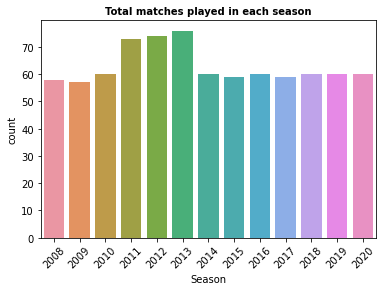

In [13]:
sns.countplot(match_data['Season'])
plt.xticks(rotation= 45, fontsize = 10 )
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")

In [14]:
season_data = match_data[['ID','Season']].merge(ball_data, left_on = 'ID', right_on = 'ID', how = 'left').drop('ID', axis = 1)
season_data.head()

,Season,Inning,Over,Ball,Batsman,Non_striker,Bowler,Batsman_runs,Extra_runs,Total_runs,Non_boundary,Is_wicket,Dismissal_kind,Player_dismissed,Fielder,Extras_type,Batting_team,Bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


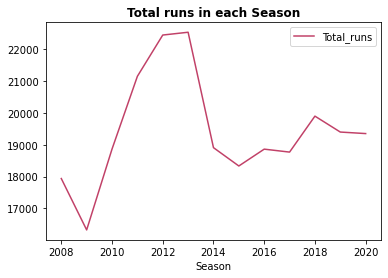

In [15]:
#total runs scoring in each season
season = season_data.groupby(['Season'])['Total_runs'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "white")

sns.lineplot(data = p, palette = "flare")
plt.title('Total runs in each Season', fontsize = 12, fontweight = 'bold')
plt.show()

In [16]:
#runs per season
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis =1)
runs_per_season['Runs scored  per match']= runs_per_season['Total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace = True)
runs_per_season

,matches,Total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: Winner, dtype: int64


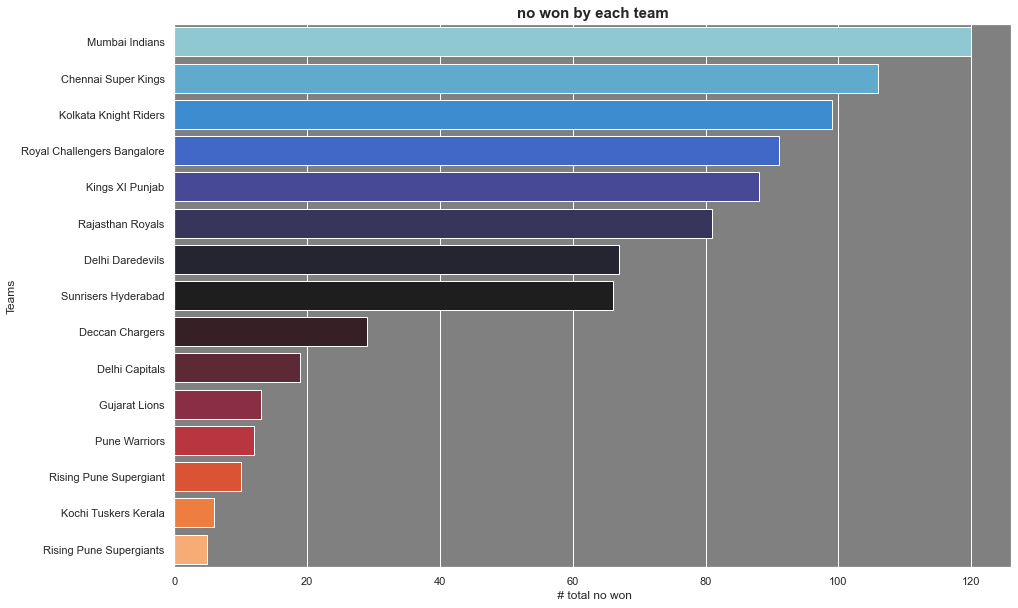

In [63]:
#max winning team 
win = match_data['Winner'].value_counts()
print(win)
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc= {'figure.figsize':(15,10)},style="darkgrid")
ax.set_title('no won by each team',fontsize = 15, fontweight = 'bold')
sns.barplot(y = win.index, x = win, orient = "h",palette = "icefire",saturation = 1)
plt.xlabel(' # total no won')
plt.ylabel('Teams')
plt.show()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: Toss_winner, dtype: int64


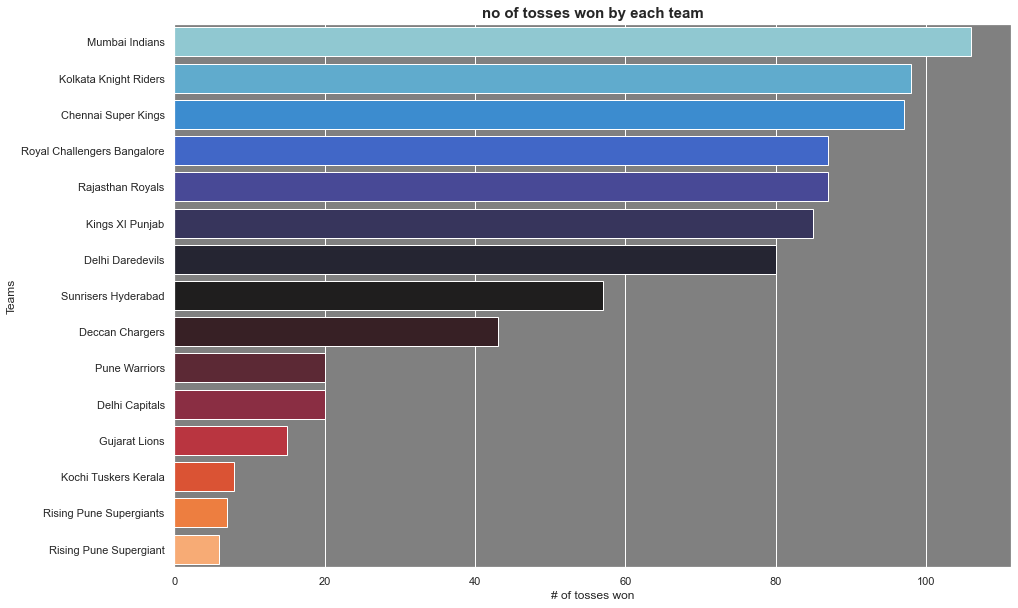

In [64]:
#Toss win by each team across all season

toss = match_data['Toss_winner'].value_counts()
print(toss)
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc= {'figure.figsize':(15,10)},style="darkgrid")
ax.set_title('no of tosses won by each team',fontsize = 15, fontweight = 'bold')
sns.barplot(y = toss.index, x = toss, orient = "h",palette = "icefire",saturation = 1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

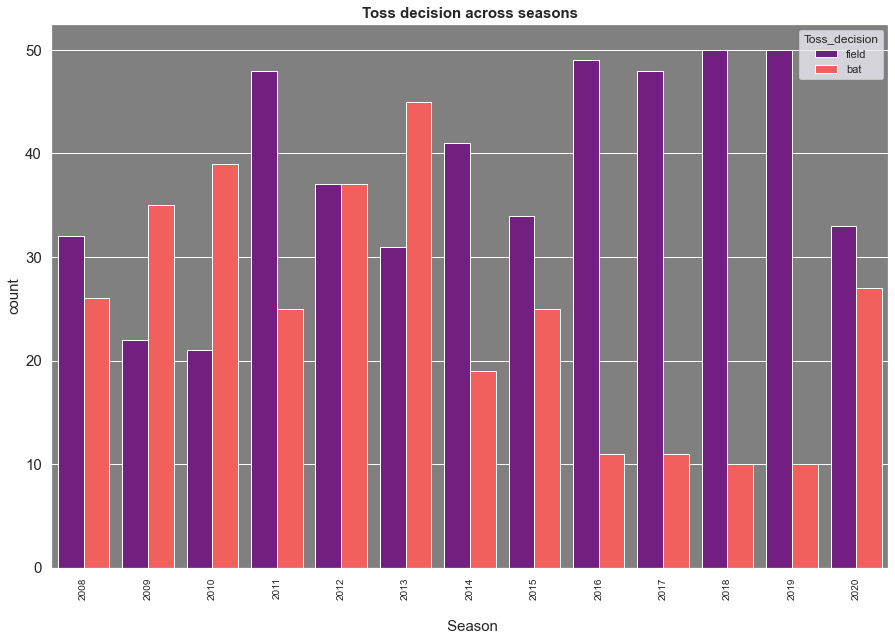

In [18]:
#toss decision acroos seasons 
ax = plt.axes()
ax.set(facecolor= "grey")
sns.countplot(x = "Season",hue = "Toss_decision", data = match_data,palette = "magma",saturation = 1)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('\n Season', fontsize =15)
plt.ylabel('count', fontsize = 15)
plt.title('Toss decision across seasons', fontsize = 15, fontweight = "bold")
plt.show()

In [19]:
match_data['Result'].value_counts()

wickets    435
runs       364
tie         13
Name: Result, dtype: int64

In [20]:
match_data.Venue[match_data.Result !='Runs'].mode()

0    Eden Gardens
Name: Venue, dtype: object

In [21]:
match_data.Venue[match_data.Result != 'Wickets'].mode()

0    Eden Gardens
Name: Venue, dtype: object

In [22]:
match_data.Venue[match_data.Toss_winner == 'Mumbai Indians'][match_data.Winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: Venue, dtype: object

In [23]:
match_data.Winner[match_data.Result!='Runs'].mode()

0    Mumbai Indians
Name: Winner, dtype: object

In [24]:
match_data.Winner[match_data.Result!='Wickets'].mode()

0    Mumbai Indians
Name: Winner, dtype: object

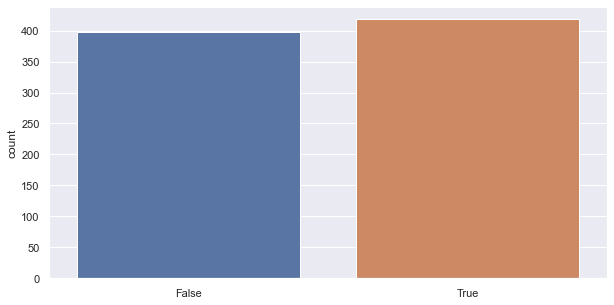

In [25]:
#winning the toss is winning the match
toss = match_data['Toss_winner']==match_data['Winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

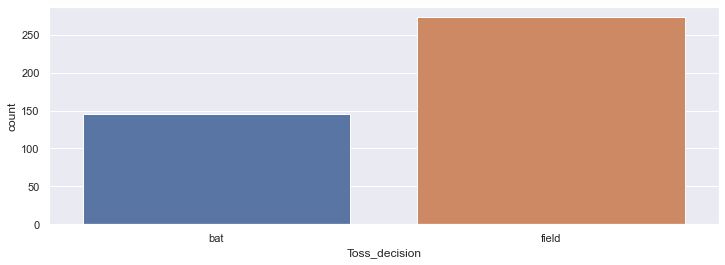

In [26]:
#higher chances of win when bat 2nd innings
plt.figure(figsize=(12,4))
sns.countplot(match_data.Toss_decision[match_data.Toss_winner==match_data.Winner])
plt.show()

In [35]:
#player ms dhoni analysis
player = (ball_data['Batsman'] =='MS Dhoni')
df_dhoni = ball_data[player]
df_dhoni.head()

,ID,Inning,Over,Ball,Batsman,Non_striker,Bowler,Batsman_runs,Extra_runs,Total_runs,Non_boundary,Is_wicket,Dismissal_kind,Player_dismissed,Fielder,Extras_type,Batting_team,Bowling_team
344,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
347,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
348,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,Chennai Super Kings,Kings XI Punjab
1624,335989,1,19,2,MS Dhoni,JDP Oram,MA Khote,0,1,1,0,0,NaN,NaN,NaN,legbyes,Chennai Super Kings,Mumbai Indians
1625,335989,1,19,5,MS Dhoni,JDP Oram,MA Khote,0,0,0,0,1,caught,MS Dhoni,DJ Bravo,NaN,Chennai Super Kings,Mumbai Indians


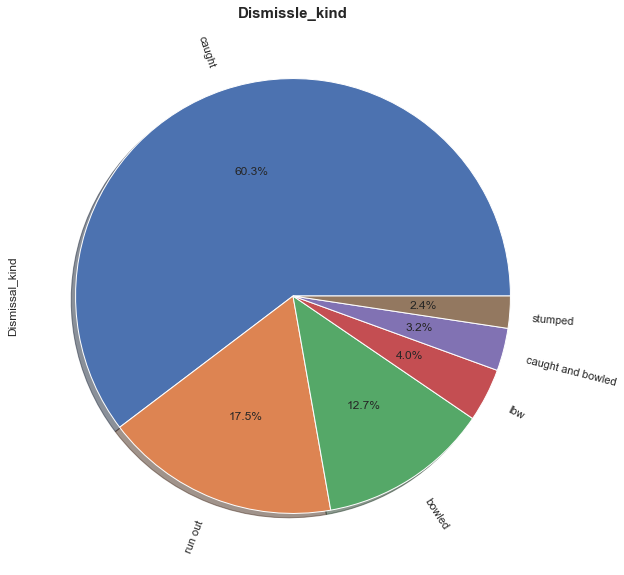

In [36]:
df_dhoni['Dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True,rotatelabels= True)
plt.title("Dismissle_kind",fontweight = "bold",fontsize = 15)
plt.show()

In [37]:
def count(df_dhoni,runs):
    return len(df_dhoni[df_dhoni['Batsman_runs']==runs])*runs


In [38]:
print("Runs scored from 1's :",count(df_dhoni,1))
print("Runs scored from 2's :",count(df_dhoni,2))
print("Runs scored from 3's :",count(df_dhoni,3))
print("Runs scored from 4's :",count(df_dhoni,4))
print("Runs scored from 6's :",count(df_dhoni,6))

Runs scored from 1's : 1409
Runs scored from 2's : 630
Runs scored from 3's : 45
Runs scored from 4's : 1252
Runs scored from 6's : 1296


In [39]:
#win by max runs
match_data[match_data['Result_margin'] == match_data['Result_margin'].max()]

,ID,City,Date,Player_of_match,Venue,Neutral_venue,Team1,Team2,Toss_winner,Toss_decision,Winner,Result,Result_margin,Eliminator,Method,Umpire1,Umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [40]:
runs = ball_data.groupby(['Batsman'])['Batsman_runs'].sum().reset_index()
runs.columns= ['Batsman', 'runs']
y = runs.sort_values(by="runs", ascending =False).head(10).reset_index().drop('index',axis = 1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

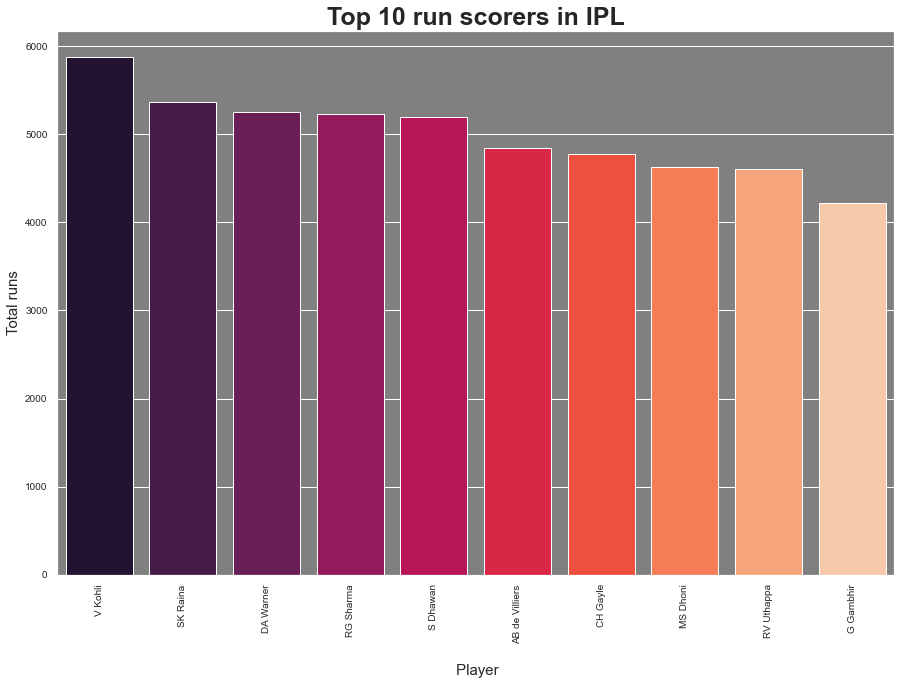

In [41]:
ax = plt.axes()
ax.set(facecolor ="grey")
sns.barplot(x=y["Batsman"],y =y["runs"], palette = 'rocket' , saturation=1)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('\n Player', fontsize = 15)
plt.ylabel('Total runs', fontsize = 15)
plt.title('Top 10 run scorers in IPL', fontsize = 25, fontweight = 'bold')


Text(0.5, 1.0, 'Highest MOM award winner')

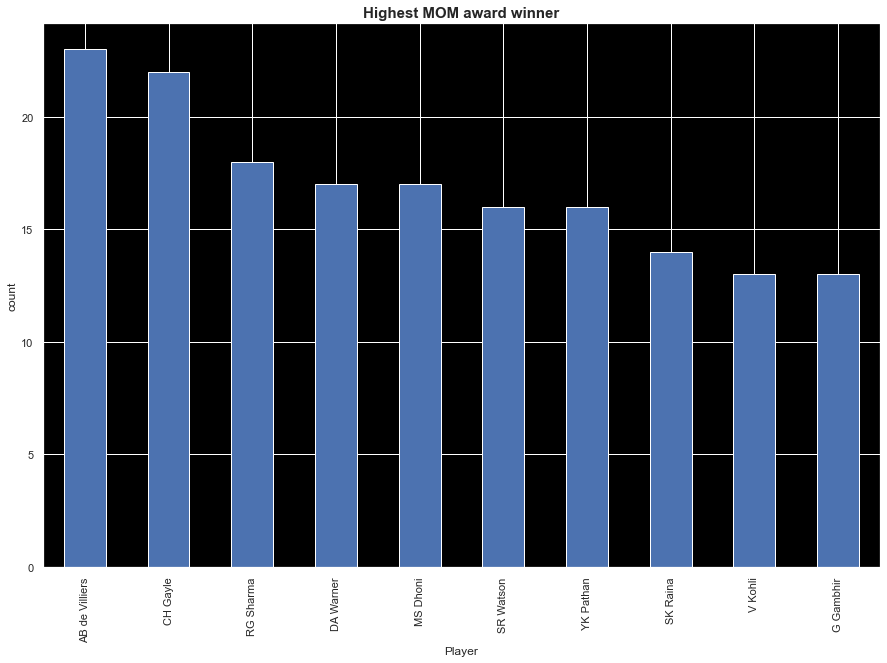

In [34]:
#highest mom award by player across all season 

ax = plt.axes()
ax.set(facecolor = 'black')
match_data.Player_of_match.value_counts()[:10].plot(kind = "bar")
plt.xlabel('Player')
plt.ylabel('count')
plt.title("Highest MOM award winner", fontsize = 15, fontweight = "bold")

In [43]:
player = (ball_data['Bowler'] =='Z Khan')
df_Khan = ball_data[player]
df_Khan.head()

,ID,Inning,Over,Ball,Batsman,Non_striker,Bowler,Batsman_runs,Extra_runs,Total_runs,Non_boundary,Is_wicket,Dismissal_kind,Player_dismissed,Fielder,Extras_type,Batting_team,Bowling_team
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


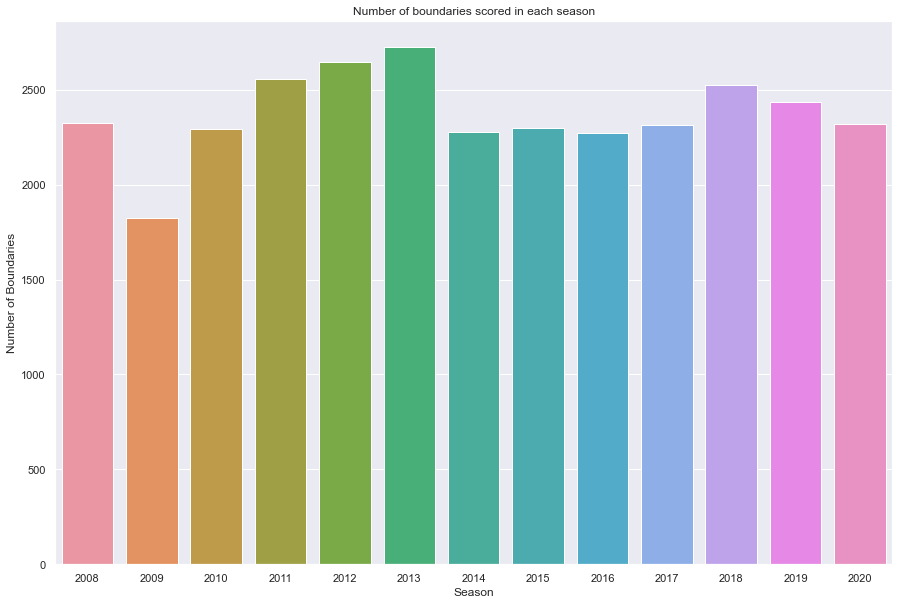

In [51]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.show()



#number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = season_data[(season_data['Batsman_runs']==4) | (season_data['Batsman_runs']==6)].groupby(['Season'])['Batsman_runs'].count().reset_index()
#barplot
barplot('Season', 'Batsman_runs', boundaries_per_season, 'Number of boundaries scored in each season',
        'Season', 'Number of Boundaries')

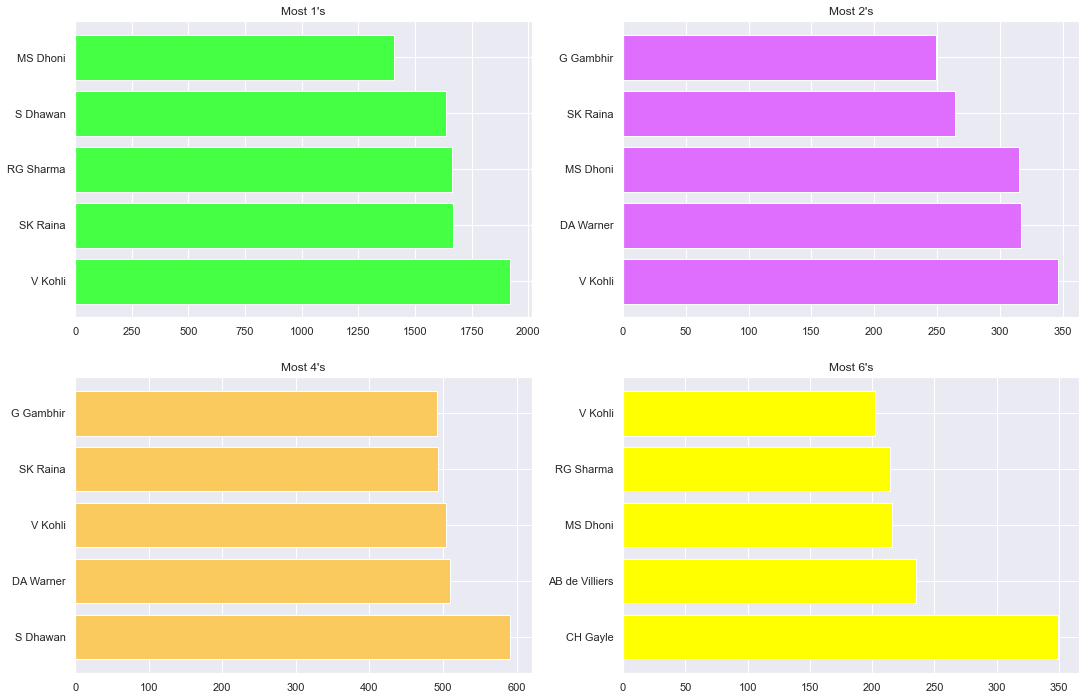

In [52]:
toppers=ball_data.groupby(['Batsman','Batsman_runs'])['Total_runs'].count().reset_index()
toppers=toppers.pivot('Batsman','Batsman_runs','Total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

In [ ]:
#By observation,

#Kohli has scored the maximum 1’s
#Kohli has the maximum 2’s .
#S Dhawan has the maximum 4’s.
#Gayle has the maximum 6’s and he leads by a big margin.

